In [1]:
# Name: Deepak Gupta
# Roll number : 167507
# Program : KNN-Mean with on Digit dataset with varying K

In [2]:
import numpy as  np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import operator

In [3]:
input_dataset=load_digits()
x=input_dataset.data[:150]
y=input_dataset.target[:150]
print(x.shape[0],x.shape[1])
k=10

x_test = input_dataset.data[150:200]
y_test = input_dataset.target[150:200]



150 64


In [4]:
no_rows=x.shape[0]
no_col=x.shape[1]
print(no_rows, no_col)
mean=[[0 for i in range(no_col)]for j in range(k)]
interval=int(no_rows/k)
print(interval)
init=0
for i in range(k):
    mean[i]=x[init]
    init=init+interval


150 64
15


In [5]:
def find_error(cluster_group, cluster_count):
    error = 0
    for i in range(k):
        for j in range(cluster_count[i]):
            if y[cluster_group[i][j]] != i:
                error = error + 1
    return error

Number of sample input is : 150
Number of test input is : 50
Number of error classification in each value of K : 
[0, 0, 0, 1, 1, 1, 3, 1, 3, 4]


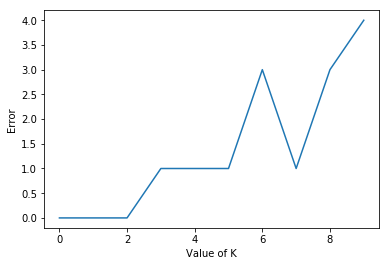

In [6]:
print("Number of sample input is : %d" % no_rows)
print("Number of test input is : %d" % len(x_test))
print("Number of error classification in each value of K : ")

num_iter = 0
max_k =10
error1 = [0 for i in range(max_k)]
for k in range(3,max_k):
    for i in range(len(x_test)):
        classification = [0 for x in range(10)]
        distance = {}
        for j in range(no_rows):
            distance[j]=np.sum(np.subtract(x[j],x_test[i])**2)
        sorted_dist = sorted(distance.items(), key = operator.itemgetter(1))
#         print(sorted_dist)
        t_itr = 0
        for key in sorted_dist:
            temp = key[0]
#             print(temp,y[temp])
            classification[y[temp]] = classification[y[temp]] + 1
            t_itr = t_itr + 1
            if t_itr == k:
                break
#         print(classification)
        cluster = classification.index(max(classification))
#         print( y[i], cluster)
        if y_test[i] != cluster:
            error1[k] = error1[k] + 1
            
print(error1) 

plt.plot(error1)
plt.xlabel("Value of K")
plt.ylabel("Error")
plt.show()



